# Test Lotka-Voltera simulator

In [1]:
import numpy as np
import corner
from matplotlib import pyplot as plt
%matplotlib inline
import logging

from goldmine.simulators.lotka_volterra import LotkaVolterra

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')
logging.getLogger().setLevel(logging.INFO)

## Run simulation

In [2]:
simulator = LotkaVolterra()

In [3]:
theta0 = simulator.theta_defaults(single_theta=True)[0][0]
print(theta0)
theta1 = (np.array([-4.62,-0.69,0.01,-4.62]))
#theta1 = simulator.theta_defaults(single_theta=True)[1][0]
print(theta1)

[-4.60517019 -0.69314718  0.         -4.60517019]
[-4.62 -0.69  0.01 -4.62]


In [4]:
x0, histories0 = simulator.rvs(theta0, 1000, return_histories=True)
x1, histories1 = simulator.rvs(theta1, 1000, return_histories=True)


20:44  Too many steps in simulation. Total rate: 98272.0
20:45  Too many steps in simulation. Total rate: 98374.0
20:49  Too many steps in simulation. Total rate: 99334.39373205959
20:49  Too many steps in simulation. Total rate: 97098.14266213523
20:53  Too many steps in simulation. Total rate: 99370.7555380746
20:55  Too many steps in simulation. Total rate: 99514.18266180056
20:55  Too many steps in simulation. Total rate: 99435.398748768
20:55  Too many steps in simulation. Total rate: 99174.80580566029


## Log r

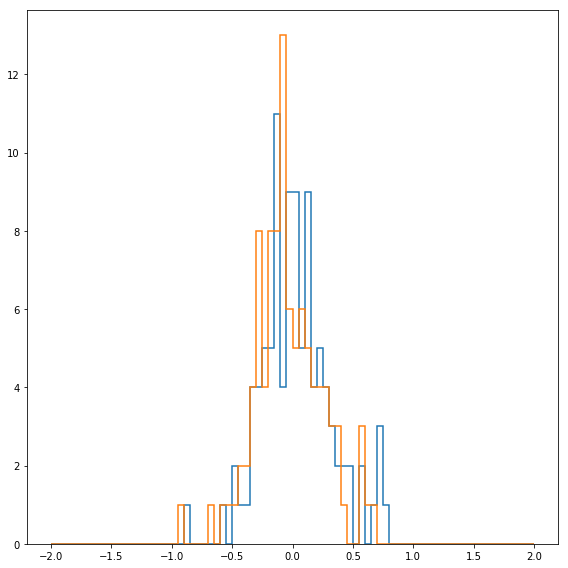

In [15]:
fig = plt.figure(figsize=(8,8))

plt.hist(np.log(log_r_xz0), range=(-2.,2.), bins=80, lw=1.5, ls='-', histtype='step')
plt.hist(np.log(log_r_xz1), range=(-2.,2.), bins=80, lw=1.5, ls='-', histtype='step')

plt.tight_layout()
plt.show()

## Plot predator and prey evolutions

In [5]:
t = np.linspace(0., 30., histories0[0].shape[0])
                
mean_histories0 = np.median(np.array(histories0), axis=0)
mean_histories1 = np.median(np.array(histories1), axis=0)


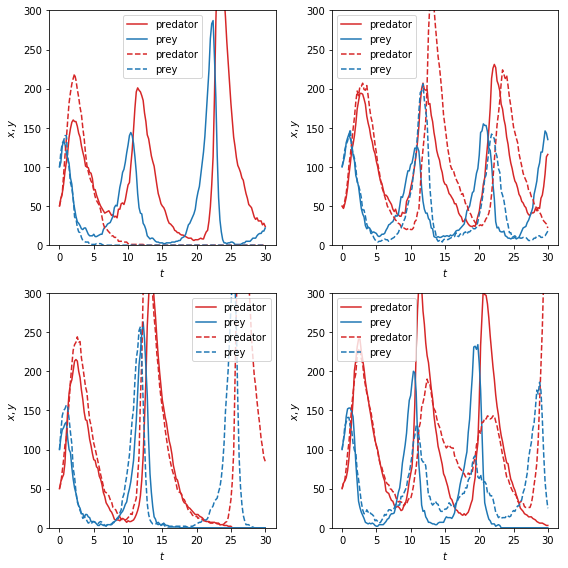

In [6]:
fig = plt.figure(figsize=(8,8))

for i in range(4):

    ax = plt.subplot(2,2,i+1)

    plt.plot(t, histories0[i][:,0], c='C3', lw=1.5, ls='-', label='predator')
    plt.plot(t, histories0[i][:,1], c='C0', lw=1.5, ls='-', label='prey')
    
    plt.plot(t, histories1[i][:,0], c='C3', lw=1.5, ls='--', label='predator')
    plt.plot(t, histories1[i][:,1], c='C0', lw=1.5, ls='--', label='prey')

    plt.legend()

    plt.xlabel(r'$t$')
    plt.ylabel(r'$x, y$')
    plt.ylim(0,300)

plt.tight_layout()
plt.show()

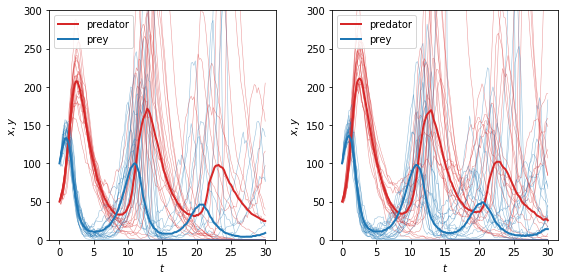

In [7]:
fig = plt.figure(figsize=(8,4))

for panel, (histories, mean_history) in enumerate(zip([histories0, histories1],
                                                    [mean_histories0, mean_histories1])):

    ax = plt.subplot(1,2,panel+1)

    for history in histories[:20]:
        plt.plot(t, history[:,0], c='C3', alpha=0.5, lw=0.5, ls='-')
        plt.plot(t, history[:,1], c='C0', alpha=0.5, lw=0.5, ls='-')
    plt.plot(t, mean_history[:,0], c='C3', lw=2., ls='-', label='predator')
    plt.plot(t, mean_history[:,1], c='C0', lw=2., ls='-', label='prey')

    plt.legend()

    plt.xlabel(r'$t$')
    plt.ylabel(r'$x, y$')
    plt.ylim(0,300)

plt.tight_layout()
plt.show()

## Summary statistics

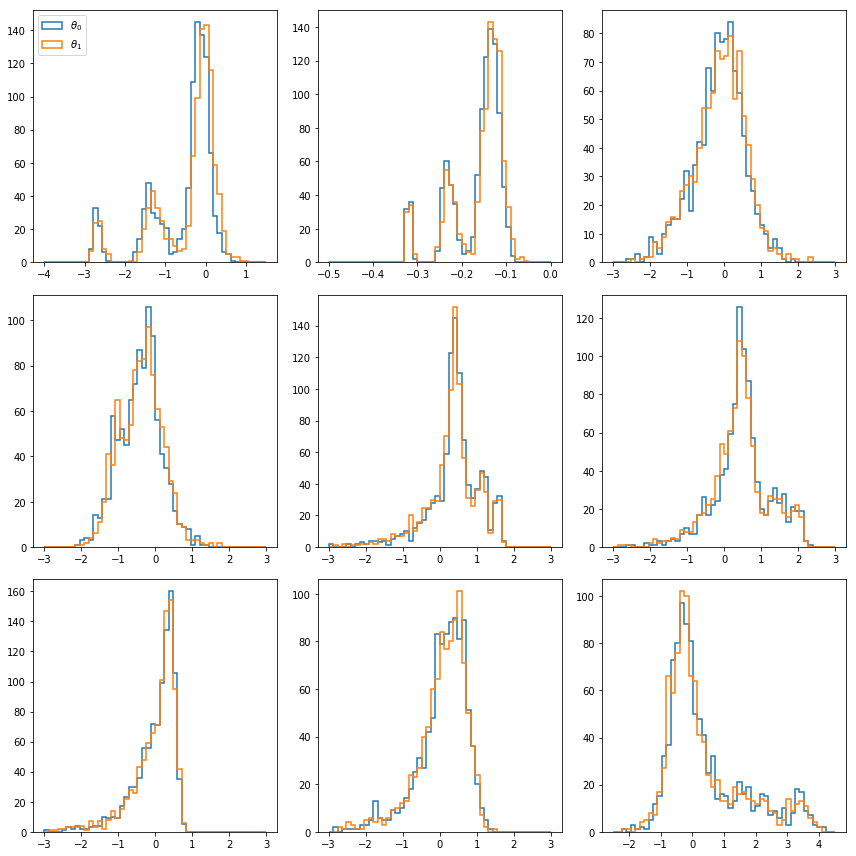

In [14]:
ranges = [(-3., 3.) for _ in range(9)]
ranges[0] = (-4.,1.5)
ranges[1] = (-0.5,0.)
ranges[8] = (-2.5,4.5)
bins = 50

plt.figure(figsize=(12,12))

for i in range(9):
    ax = plt.subplot(3,3,i+1)
       
    plt.hist(x0[:,i], histtype='step', range=ranges[i], bins=bins, lw=1.5, label=r'$\theta_0$') 
    plt.hist(x1[:,i], histtype='step', range=ranges[i], bins=bins, lw=1.5, label=r'$\theta_1$') 
    
    if i == 0:
        plt.legend(loc='upper left')
    
plt.tight_layout()
plt.savefig('x_distribution_close_thetas.pdf')

20:56  Too few points to create valid contours
20:56  Too few points to create valid contours
20:56  Too few points to create valid contours
20:56  Too few points to create valid contours
20:56  Too few points to create valid contours
20:56  Too few points to create valid contours
20:56  Too few points to create valid contours
20:56  Too few points to create valid contours
20:56  Too few points to create valid contours
20:56  Too few points to create valid contours
20:56  Too few points to create valid contours
20:56  Too few points to create valid contours
20:56  Too few points to create valid contours
20:56  Too few points to create valid contours


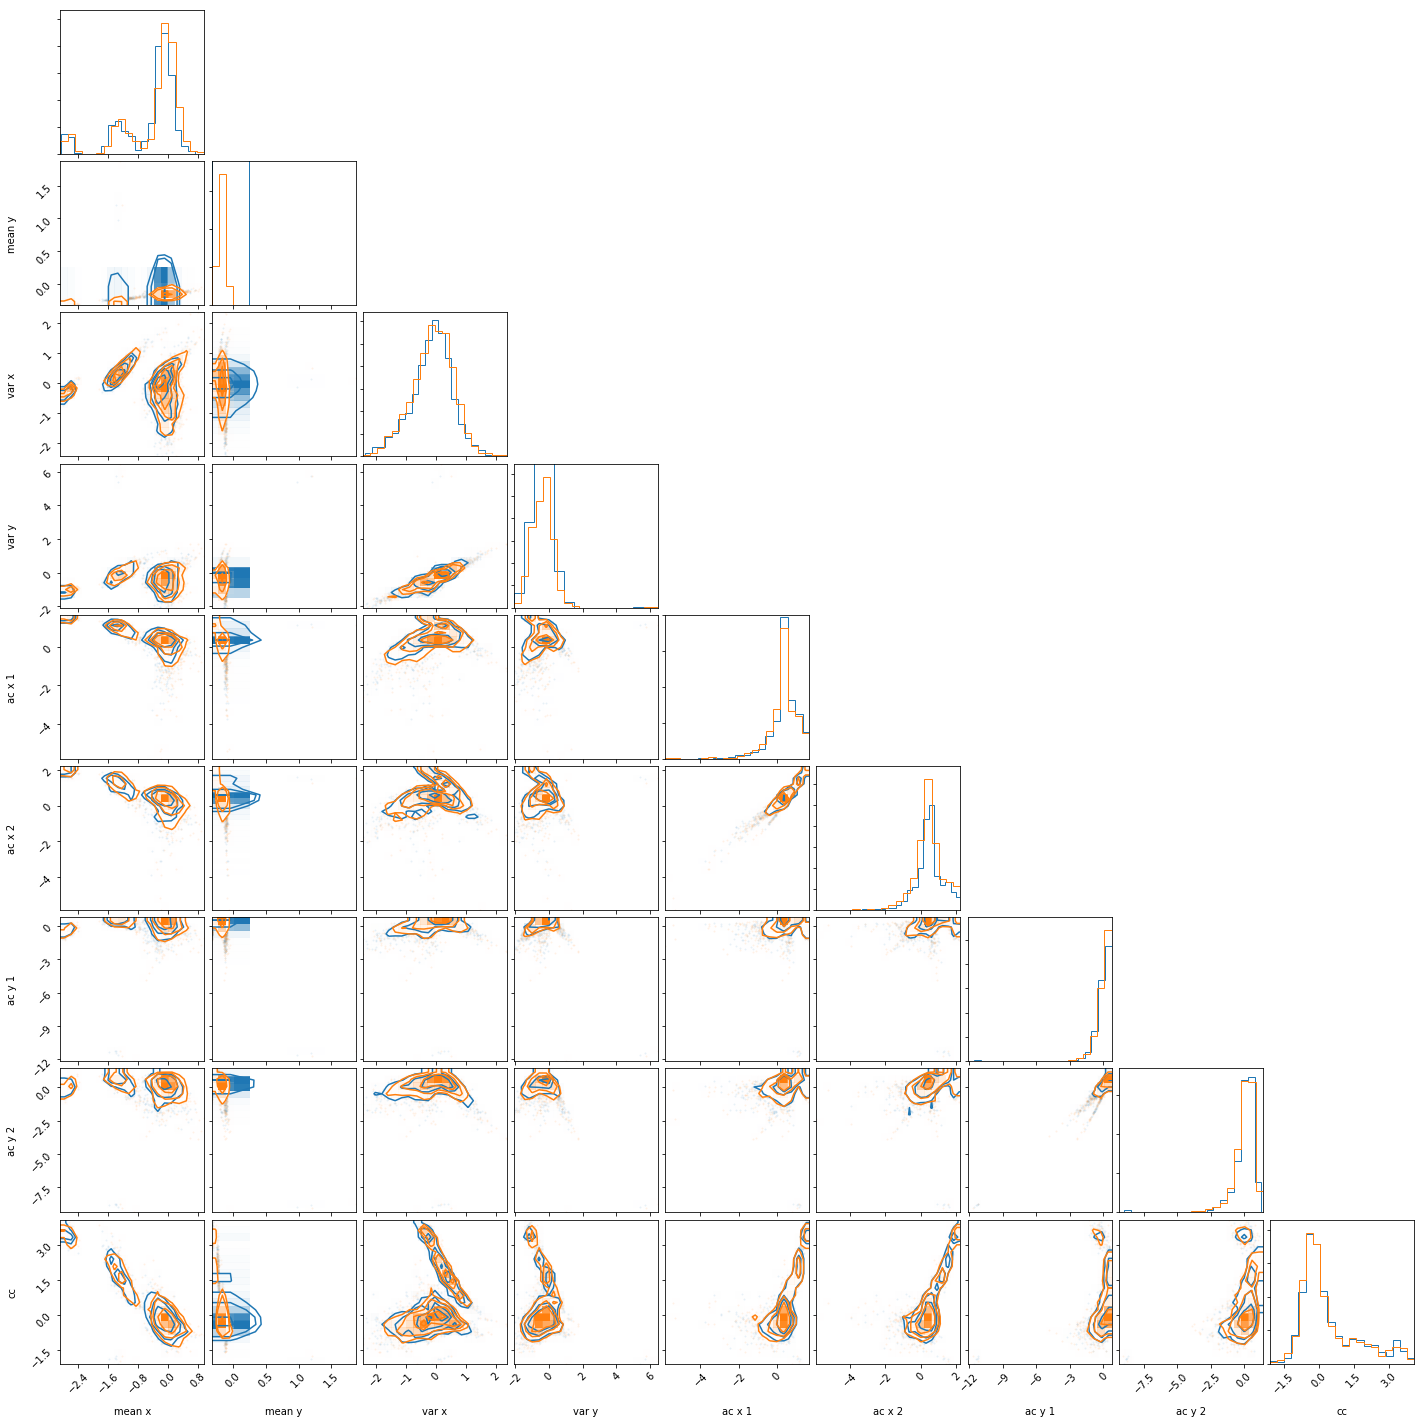

In [9]:
import corner

labels = [r'mean x', r'mean y', r'var x', r'var y', r'ac x 1', r'ac x 2', r'ac y 1', r'ac y 2', 'cc']

fig = corner.corner(x0, color='C0', labels=labels, ranges=ranges)
_ = corner.corner(x1, color='C1', labels=labels, fig=fig, ranges=ranges)